In [12]:
pip install keras

In [13]:
pip install tensorflow

In [22]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.optimizers import SGD
import matplotlib.pyplot as plt


# Initialising the CNN
model_3_hidden= Sequential()

# Step 1 - Convolution
model_3_hidden.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))

# Adding Second convolutional layer
model_3_hidden.add(Conv2D(32, (3, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))

# Adding Third convolutional layer
model_3_hidden.add(Conv2D(32, (3, 3), activation = 'relu'))
model_3_hidden.add(MaxPooling2D(pool_size = (2, 2)))
model_3_hidden.add(Dropout(0.2))

# Step 3 - Flattening
model_3_hidden.add(Flatten())

# Step 4 - Full connection
model_3_hidden.add(Dense(units = 128, activation = 'relu'))
model_3_hidden.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
optim=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model_3_hidden.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model_3_hidden.summary()
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Pneumonia detection/chest_xray/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Pneumonia detection/chest_xray/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=model_3_hidden.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = len(test_set))




Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 12, 32)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


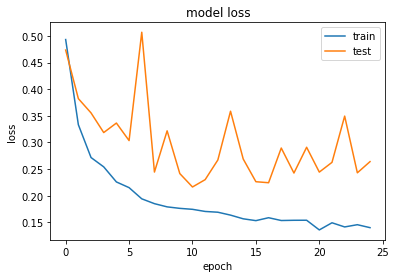

In [23]:
# plotting training set and validation test 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='left')
plt.show()

**CONCLUSION**

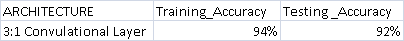